In [129]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

In [130]:
path = '/Users/srinidhienaidu/Downloads/LAB #1- GIANNA KINSEY AND SRINIDHIS DAY OF FUN.mat'
roach_dict = scipy.io.loadmat(path)

In [131]:
print(roach_dict.keys())
print(roach_dict['titles'])
sample_rate = int(roach_dict['samplerate'][0][0])

dict_keys(['data', 'datastart', 'dataend', 'titles', 'rangemin', 'rangemax', 'unittext', 'unittextmap', 'blocktimes', 'tickrate', 'samplerate', 'firstsampleoffset', 'comtext', 'com'])
['Channel 1' 'Channel 2' 'Channel 3']


In [132]:
start_times = roach_dict['datastart'][0]
end_times = roach_dict['dataend'][0]

all_data = roach_dict['data'].flatten()

chunks = zip(start_times, end_times)
list_of_tuples = list(chunks)
start_stops = np.array(list_of_tuples)

NUM_SESSION = start_times.shape[0]
NUM_TPTS = sample_rate * 9 #total of nine seconds (9 different stimuli)
print('num session', NUM_SESSION, 'num tpts', NUM_TPTS)

num session 19 num tpts 360000


In [133]:
sequence = np.array([40, 10, 20, 40, 20, 10, 10, 20, 40])


# idx_40 = np.where(sequence == 40)[0]
# idx_20 = np.where(sequence == 20)[0]
# idx_10 = np.where(sequence == 10)[0]

In [134]:
data_chunked = {}

for session in range(NUM_SESSION - 1):
    no_spont = session + 1
    counter = 0
    # if session == 0:
    #     name = 'spont'
    if 1 <= no_spont <= 6:
        name = f'pos1_{session}'
        if (session) < 3:
            name = f'pos1_amp_{session}'
        else:
            name = f'pos1_vel_{session}'
        counter += 1
    if 6 < no_spont <= 12:
        if (session - 6) < 3:
            name = f'pos2_amp_{session - 6}'
        else:
            name = f'pos2_vel_{session - 6}'
    if 13 <= no_spont <= NUM_SESSION:
        if (session - 12) < 3:
            name = f'pos3_amp_{session - 12}'
        else:
            name = f'pos3_vel_{session - 12}'
        # name = f'pos3_{session - 12}'

    start = int(start_stops[no_spont][0])
    end = int(start_stops[no_spont][1])

    pre_threshold = all_data[start:end][0:NUM_TPTS]
    
    post_threshold = np.zeros(NUM_TPTS)

    for idx, spike in enumerate(pre_threshold):
        if spike < 0.005: # should i set the lower threshold too or is just the upper one fine?
            post_threshold[idx] = 0
        else:
            post_threshold[idx] = 1
    
    data_chunked[name] = post_threshold
    
    print(name, 'completed')

pos1_amp_0 completed
pos1_amp_1 completed
pos1_amp_2 completed
pos1_vel_3 completed
pos1_vel_4 completed
pos1_vel_5 completed
pos2_amp_0 completed
pos2_amp_1 completed
pos2_amp_2 completed
pos2_vel_3 completed
pos2_vel_4 completed
pos2_vel_5 completed
pos3_amp_0 completed
pos3_amp_1 completed
pos3_amp_2 completed
pos3_vel_3 completed
pos3_vel_4 completed
pos3_vel_5 completed


In [135]:
keys = data_chunked.keys()
keys_list = list(keys)

<Figure size 1000x360 with 0 Axes>

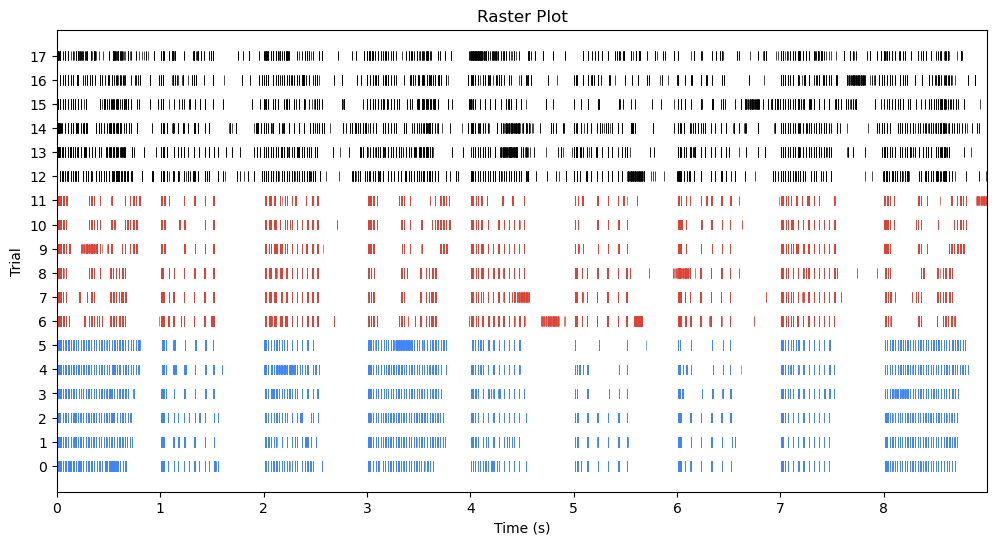

In [136]:
all_data = []
for data in data_chunked.keys():
    all_data.append(data_chunked[data])


all_data = np.vstack(all_data)
# avg = all_data.reshape(6, 3, 360000).mean(axis=1)


# Adjust the height of the raster plot
plt.figure(figsize=(10, len(all_data) / 5))  # Adjust the height for better visibility

# for idx, trial in enumerate(all_data):
#     spike_times = np.where(trial == 1)[0] / 40000  # Convert indices to time in seconds
#     # Set the size `s` to a very small value to represent thin tick marks
#     plt.scatter(spike_times, np.full_like(spike_times, idx), s=0.1, color='grey')  # Use 'color' to set point color

plt.figure(figsize=(12, 6))  # Set figure size
indices = np.arange(0, 18, 1)

spike_time_amp = []
counter = 0
for idx in indices:
    data_view = all_data[idx]
    spike_times = np.where(data_view == 1)[0] / 40000  # Convert indices to time in seconds
    spike_time_amp.append(spike_times)
    if counter < 6:
        color_if = 	"#4285F4"
    elif 6 <= counter < 12:
        color_if = '#DB4437'
    else:
        color_if = 'k'
    plt.vlines(spike_times, idx - 0.2, idx + 0.2, color= color_if, linewidth=0.5)  # Draw thin vertical lines
    counter += 1 

# Adjust y-ticks to be at the right positions without gaps
plt.yticks(np.arange(len(all_data)))

plt.title('Raster Plot')
plt.xlabel('Time (s)')
plt.ylabel('Trial')
plt.xlim(0, np.max([np.where(trial == 1)[0].max() for trial in all_data]) / 40000)  # Adjust x-axis limits
plt.show()


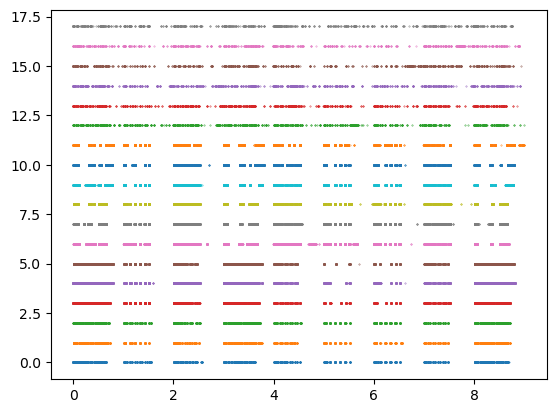

In [137]:
all_data = []
for data in data_chunked.keys():
    all_data.append(data_chunked[data])

for idx, trial in enumerate(all_data):
    spike_times = np.where(trial == 1)[0] / 40000  # Convert indices to time in seconds
    plt.scatter(spike_times, np.full_like(spike_times, idx), s=0.1)  # `s` controls point size

# # tester = data_chunked['pos1_amp_0']
# spike_times = np.where(tester == 1)[0] / 40000  # Convert indices to time in seconds
# plt.figure(figsize=(10, 6))
# # Create the raster plot
# plt.scatter(spike_times, np.full_like(spike_times, 0), s = 0.01)

In [53]:
def avg_sp_per_sess(raw_session_data):
    spike_heights = data_chunked[raw_session_data]  
    spike_threshold = 0  
    spike_counts = []
    chunk_size = int(NUM_TPTS / (NUM_SESSION - 1))
    selected_indices = [0, 2, 4, 6, 8, 10, 12, 14, 16]

    for i in selected_indices:
        chunk = spike_heights[i * chunk_size:(i + 1) * chunk_size]
        count_spikes = np.sum(chunk > spike_threshold)
        spike_counts.append(count_spikes)

    spike_counts = np.array(spike_counts)
    unique_sequences = np.unique(sequence)

    average_spike_counts = []

    for seq_type in unique_sequences:
        indices = np.where(sequence == seq_type)[0]
        spike_counts_for_seq_type = spike_counts[indices]
        avg_spike_count = np.mean(spike_counts_for_seq_type)
        average_spike_counts.append(avg_spike_count)

    return average_spike_counts


In [54]:
session_avgs = {}
for key in data_chunked.keys():
    session_avgs[key] = avg_sp_per_sess(key)

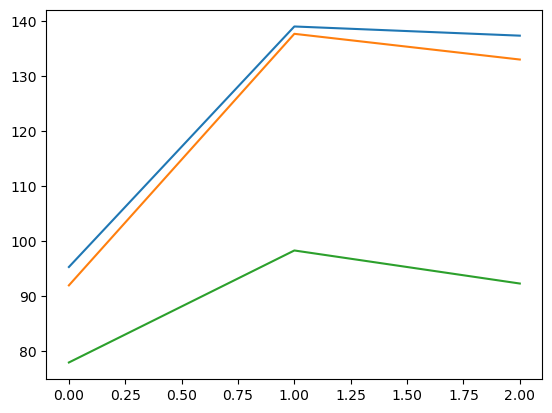

In [83]:
pos_name = 'pos3_amp'

indices = []
# vel_or_amp = 'amp'
for key in session_avgs.keys():
    if pos_name in key:

        plt.plot(session_avgs[key])
        # print(type(key))

[208.66666666666666, 244.0, 350.3333333333333]